In [176]:
import json
import os
import numpy as np
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

UsageError: Line magic function `%` not found.


In [177]:
def load_trials_dict(result_dict_location):
    if os.path.exists(result_dict_location):
        with open(result_dict_location, 'r') as f:
            data = json.load(f)
            return data
    return None

In [220]:
# DATA_PATH_TO_PLOT = "./trial_results_first_128.json"
DATA_PATH_TO_PLOT = './trial_results.json'
# DATA_PATH_TO_PLOT = './trial_results_mid_512.json'

In [221]:
data = load_trials_dict(DATA_PATH_TO_PLOT)

In [222]:
data.keys()

dict_keys(['0.0_last', '0.0_middle', '0.1_last', '0.1_middle', '0.2_last', '0.2_middle', '0.3_last', '0.3_middle', '0.4_last', '0.4_middle', '0.5_last', '0.5_middle'])

In [223]:
num_neurons = os.path.splitext(os.path.basename(DATA_PATH_TO_PLOT))[0].split('_')[-1]


In [224]:
# data[list(data.keys())[0]]

In [225]:
std_dict = {}
for model_key in data.keys():
    for dropout_key, scores in data[model_key].items():
        if std_dict.get(model_key) is None:
            std_dict[model_key] = {}
        scores = np.array(scores)
        std_dict[model_key][dropout_key] = round(scores.std(), 6)
        data[model_key][dropout_key] = round(scores.mean(), 6)
        # print(np.round(np.sqrt(np.mean(np.power(arr - arr.mean(), 2))), 5), np.round(arr.std(), 5))

In [226]:
def get_data_as_tuples(primary_key):
    train_rate_acc, test_rate_acc = [], []
    for key in data[primary_key].keys():
        rate = round(float(key.split("_")[0]), 1)
        acc = data[primary_key][key]
        std = std_dict[primary_key][key]
        if "train" in key:
            train_rate_acc.append((rate, acc, std))  # (dropout_rate, accuracy-20-epochs)
        elif "test" in key:
            test_rate_acc.append((rate, acc, std))
    return train_rate_acc, test_rate_acc

In [227]:
train_rate_acc, test_rate_acc = get_data_as_tuples(list(data.keys())[0])

In [228]:
train_rate_acc

[(0.0, 0.981999, 0.000496),
 (0.1, 0.981818, 0.000494),
 (0.2, 0.981494, 0.000458),
 (0.3, 0.981427, 0.000468),
 (0.4, 0.980905, 0.000506),
 (0.5, 0.980762, 0.000397),
 (0.6, 0.979999, 0.000629),
 (0.7, 0.97882, 0.000529),
 (0.8, 0.976638, 0.00036),
 (0.9, 0.9689, 0.000484),
 (1.0, 0.1, 0.0)]

In [229]:
test_rate_acc

[(0.0, 0.9201, 0.0),
 (0.1, 0.91966, 0.000483),
 (0.2, 0.919455, 0.000546),
 (0.3, 0.9195, 0.000848),
 (0.4, 0.919, 0.000731),
 (0.5, 0.918325, 0.000782),
 (0.6, 0.91809, 0.000997),
 (0.7, 0.91677, 0.000956),
 (0.8, 0.913515, 0.001247),
 (0.9, 0.90572, 0.001657),
 (1.0, 0.1, 0.0)]

In [230]:
def get_unpacked_xy(test_list, train_list):
    test_rate = np.array([tup[0] for tup in test_list])
    test_acc = np.array([tup[1] for tup in test_list])
    test_std = np.array([tup[2] for tup in test_list])
    train_rate = np.array([tup[0] for tup in train_list])
    train_acc = np.array([tup[1] for tup in train_list])
    train_std = np.array([tup[2] for tup in train_list])
    return test_rate, test_acc, test_std, train_rate, train_acc, train_std

0.0_last [0.000496 0.000494 0.000458 0.000468 0.000506 0.000397 0.000629 0.000529
 0.00036  0.000484 0.      ]


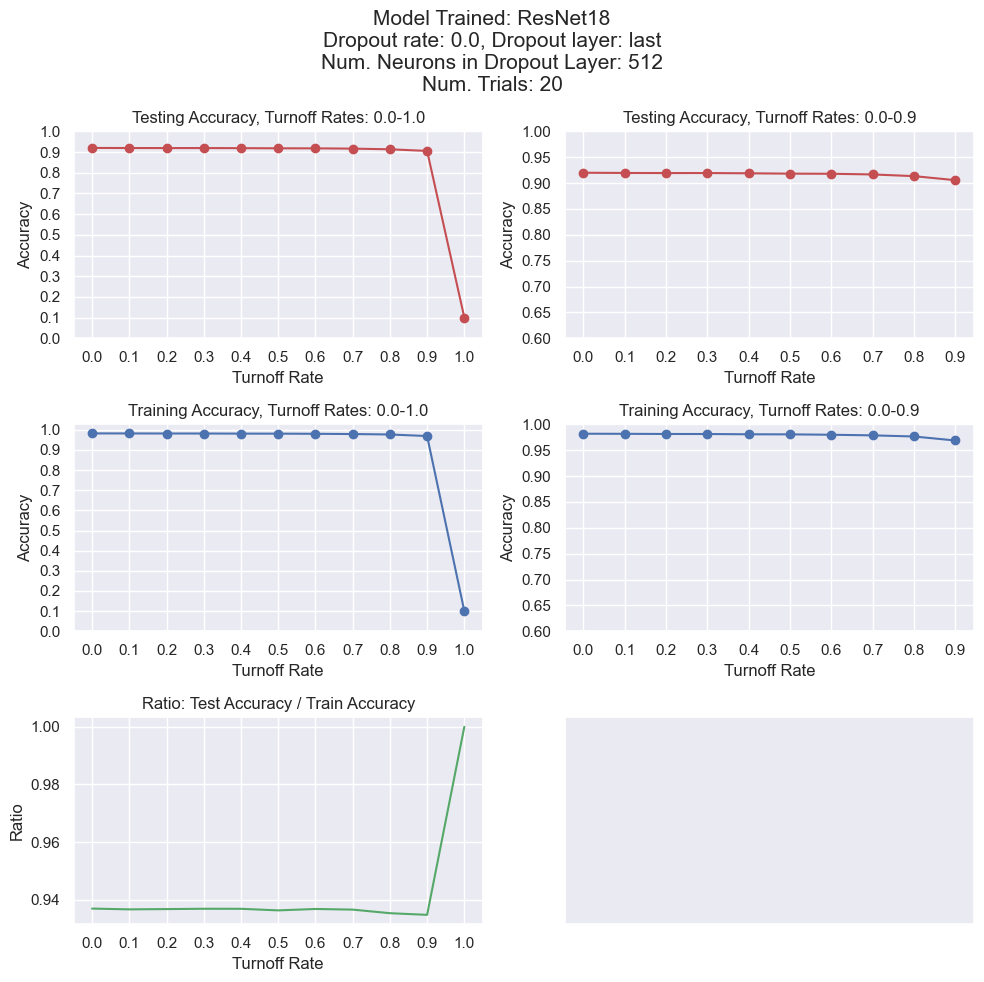

0.0_middle [0.000496 0.000645 0.000535 0.000737 0.000455 0.000713 0.0007   0.001085
 0.001187 0.00146  0.      ]


<Figure size 640x480 with 0 Axes>

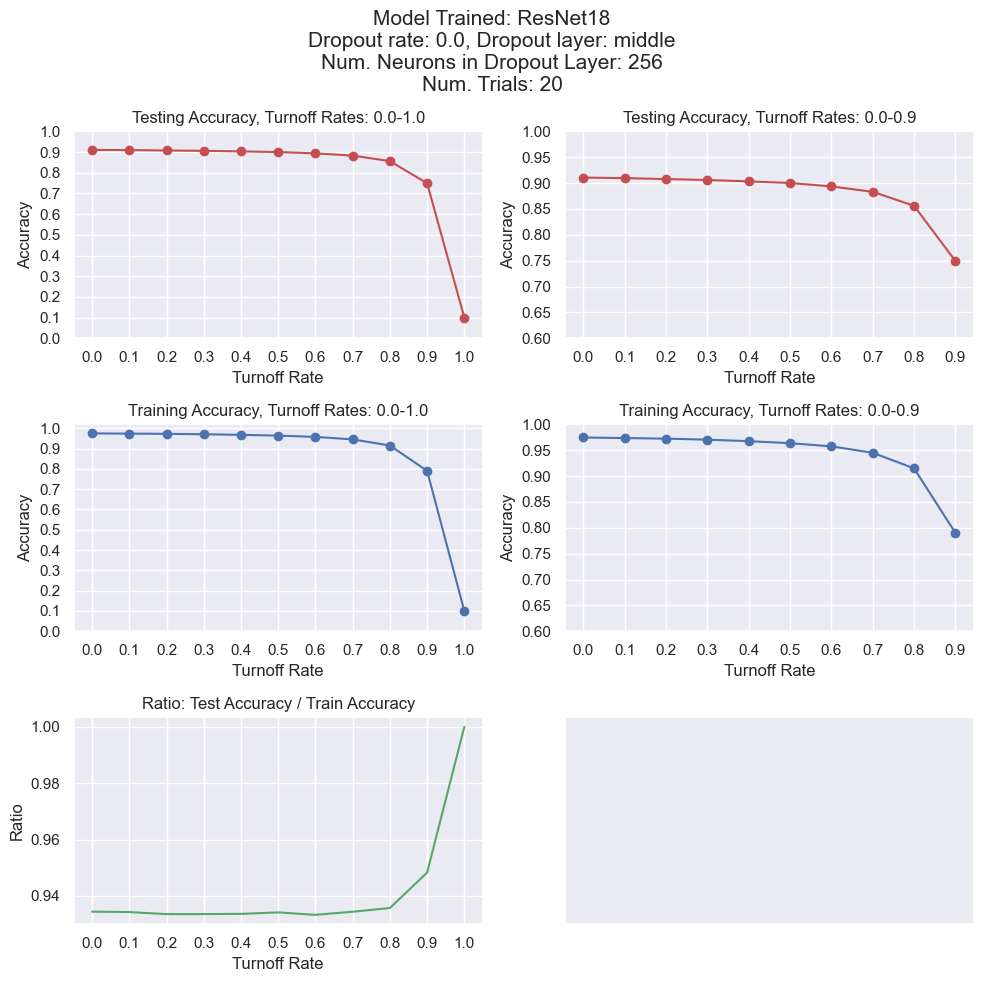

0.1_last [0.000577 0.000653 0.000494 0.000504 0.000561 0.000586 0.000535 0.000571
 0.00056  0.000622 0.      ]


<Figure size 640x480 with 0 Axes>

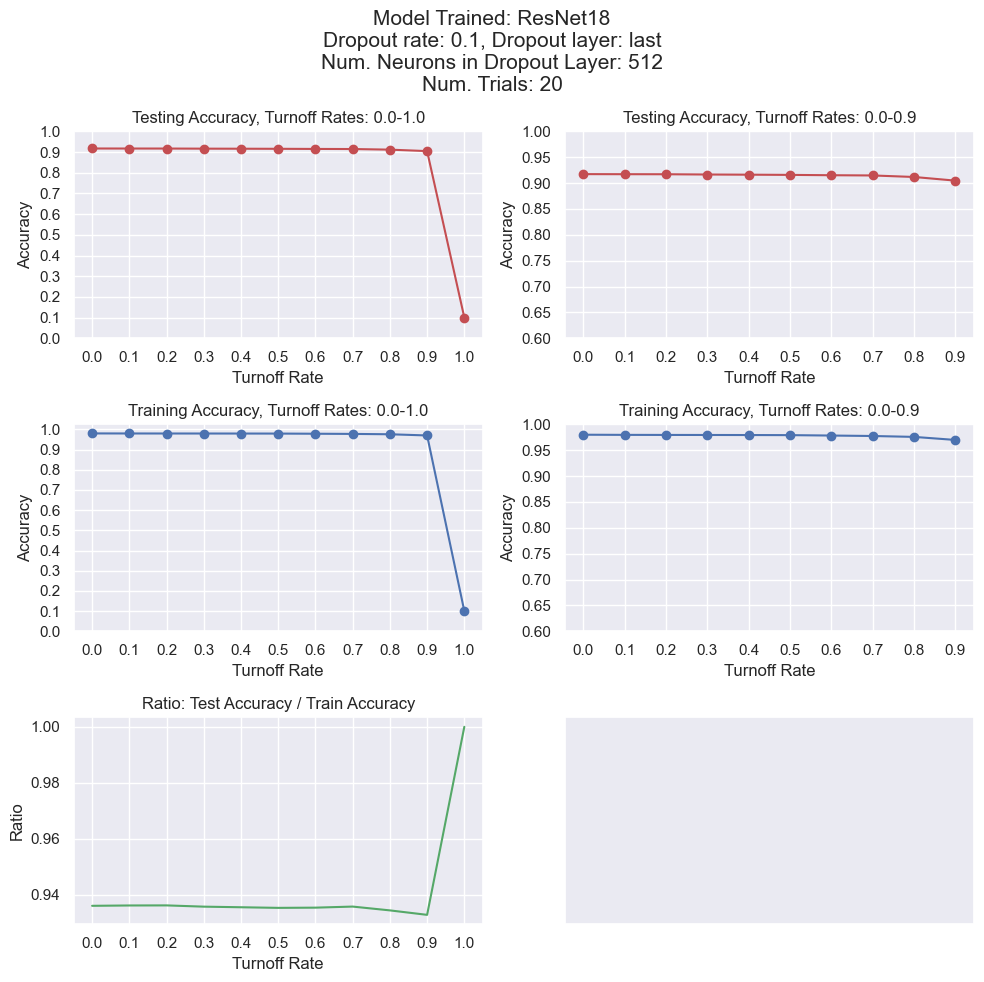

0.1_middle [0.000651 0.000542 0.000547 0.000669 0.000504 0.000433 0.000763 0.00072
 0.000618 0.001305 0.      ]


<Figure size 640x480 with 0 Axes>

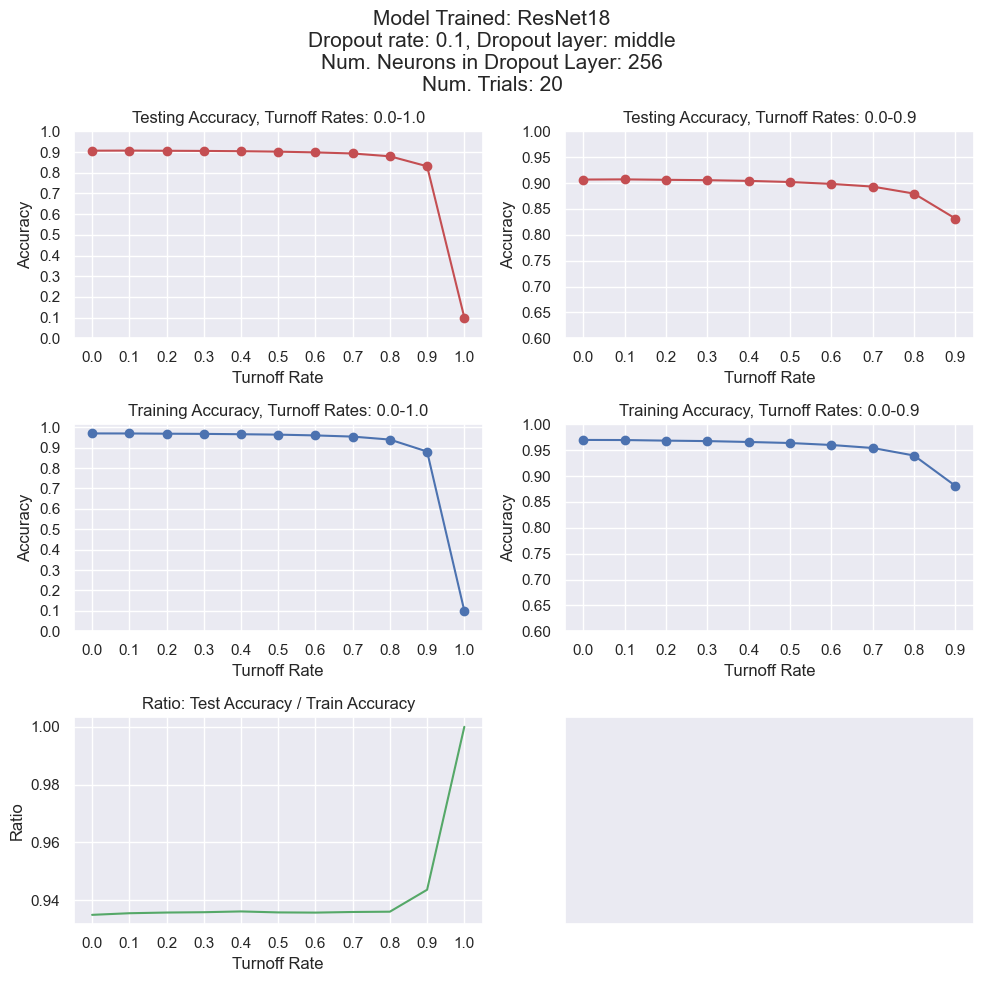

0.2_last [0.00038  0.000391 0.000615 0.000464 0.000409 0.000587 0.000456 0.000624
 0.000656 0.000592 0.      ]


<Figure size 640x480 with 0 Axes>

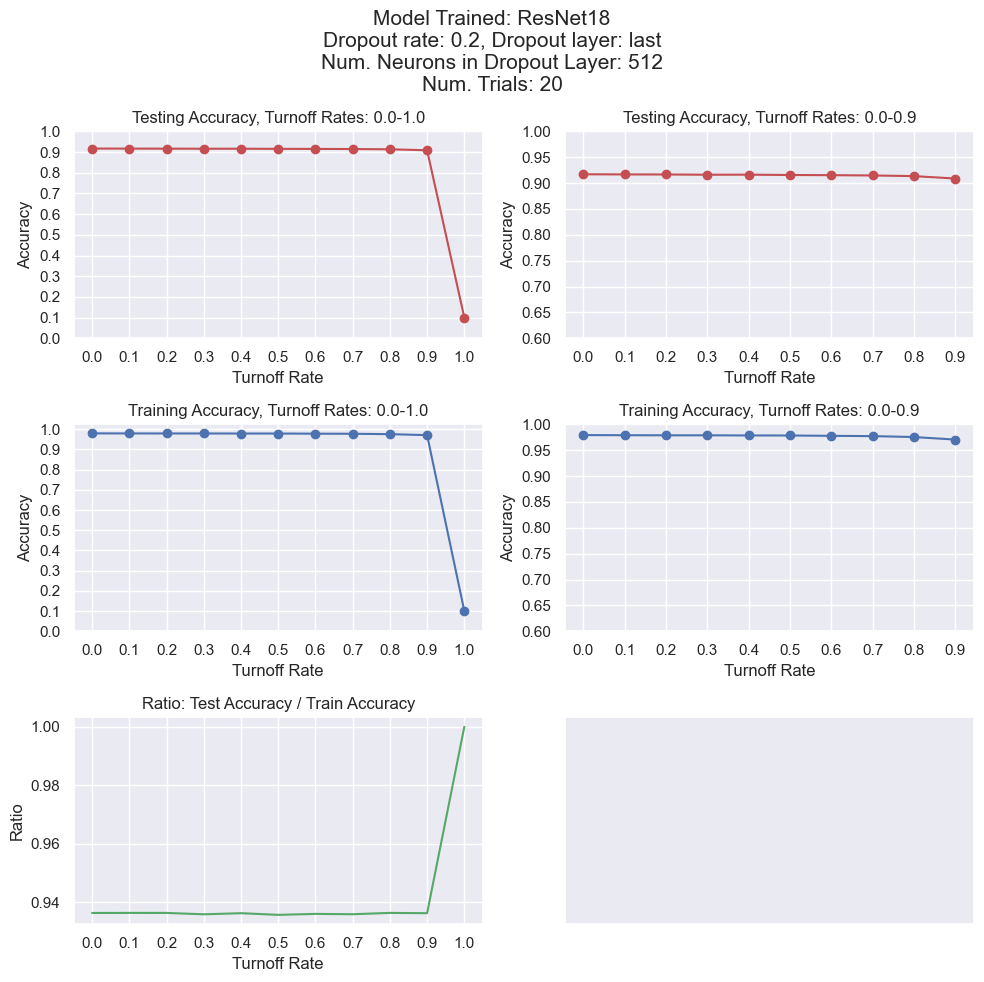

0.2_middle [0.000459 0.000558 0.000636 0.000497 0.000599 0.000611 0.000562 0.000812
 0.000443 0.001021 0.      ]


<Figure size 640x480 with 0 Axes>

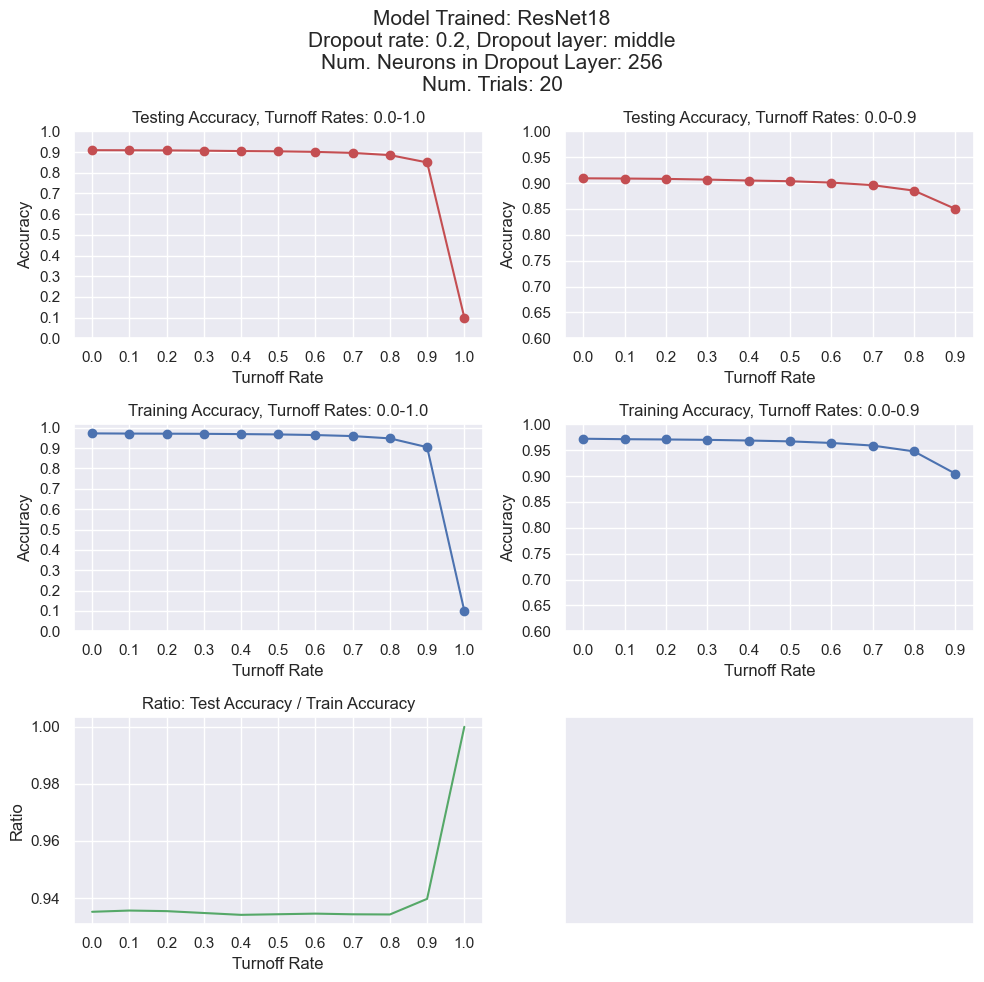

0.3_last [0.000669 0.000623 0.000389 0.000372 0.000565 0.000437 0.000497 0.000656
 0.000426 0.000726 0.      ]


<Figure size 640x480 with 0 Axes>

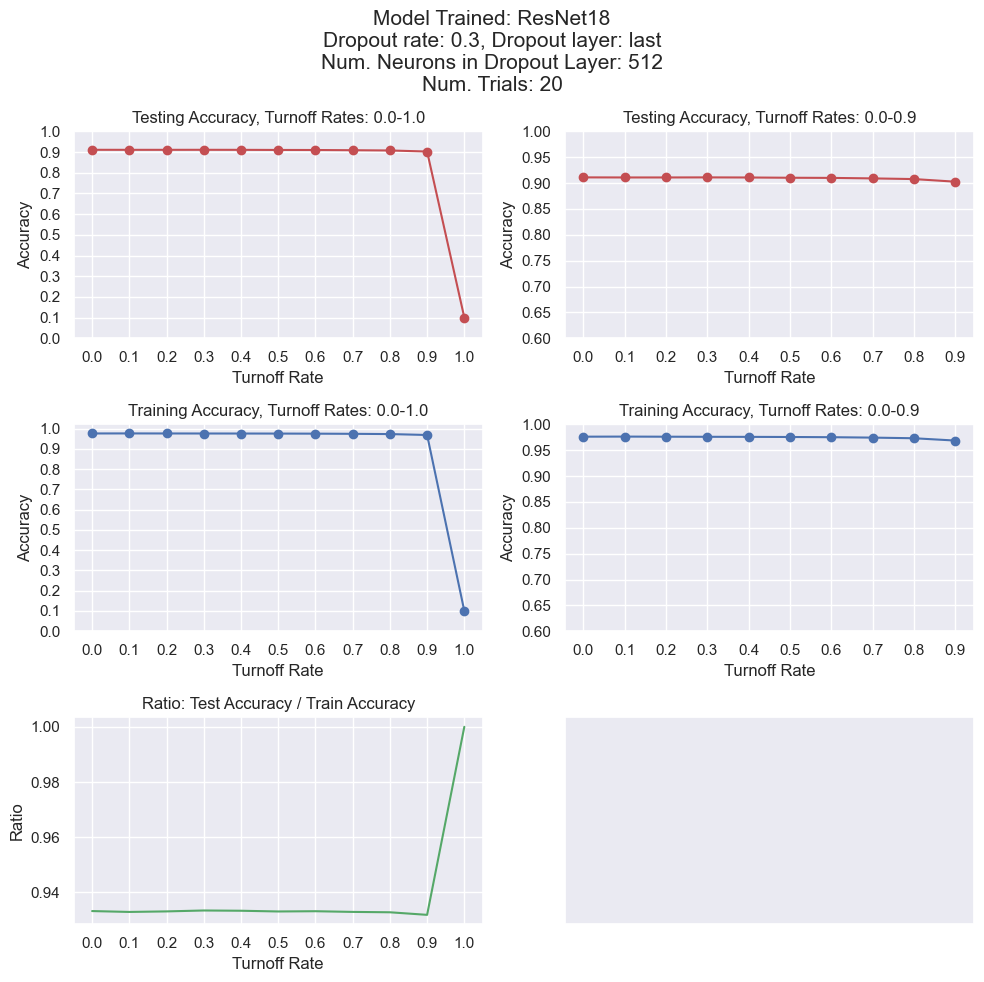

0.3_middle [0.000484 0.00056  0.000548 0.000698 0.000586 0.000817 0.000578 0.000475
 0.00062  0.001333 0.      ]


<Figure size 640x480 with 0 Axes>

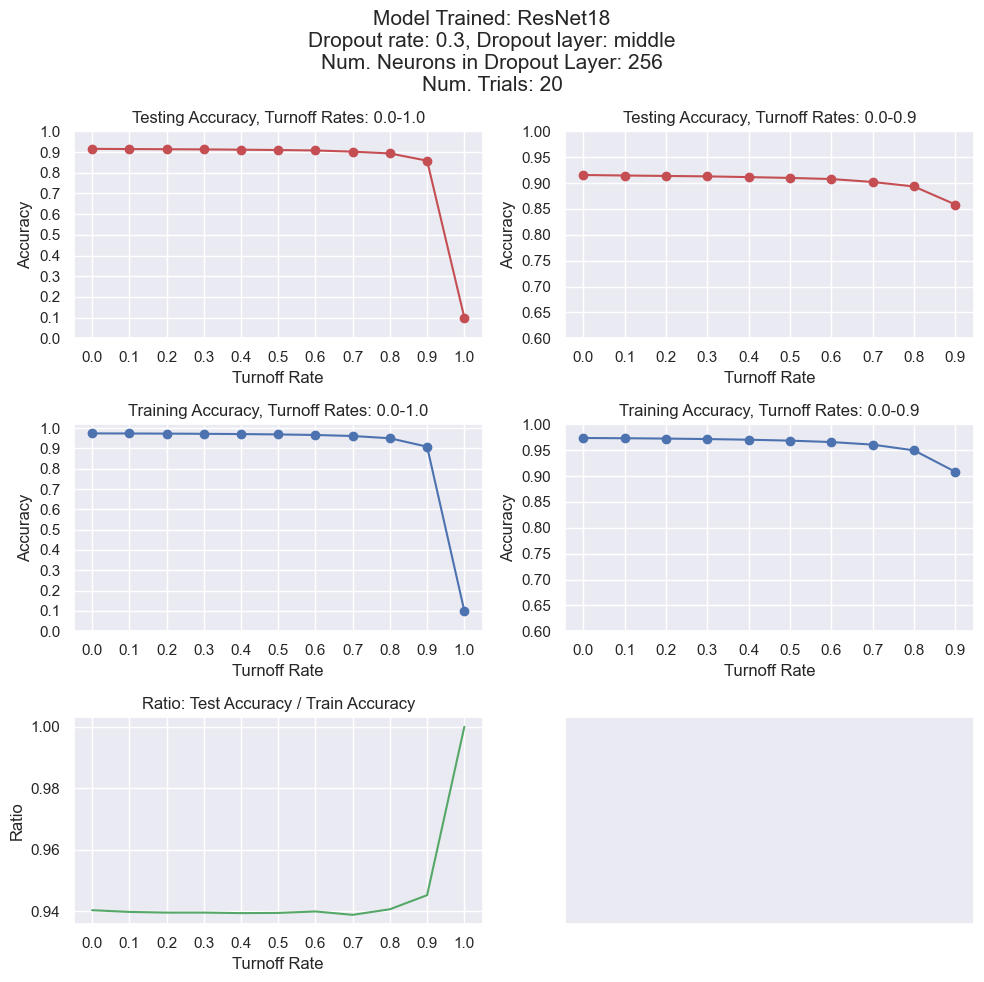

0.4_last [0.000864 0.000538 0.000364 0.000572 0.000545 0.000721 0.0007   0.000564
 0.000361 0.00062  0.      ]


<Figure size 640x480 with 0 Axes>

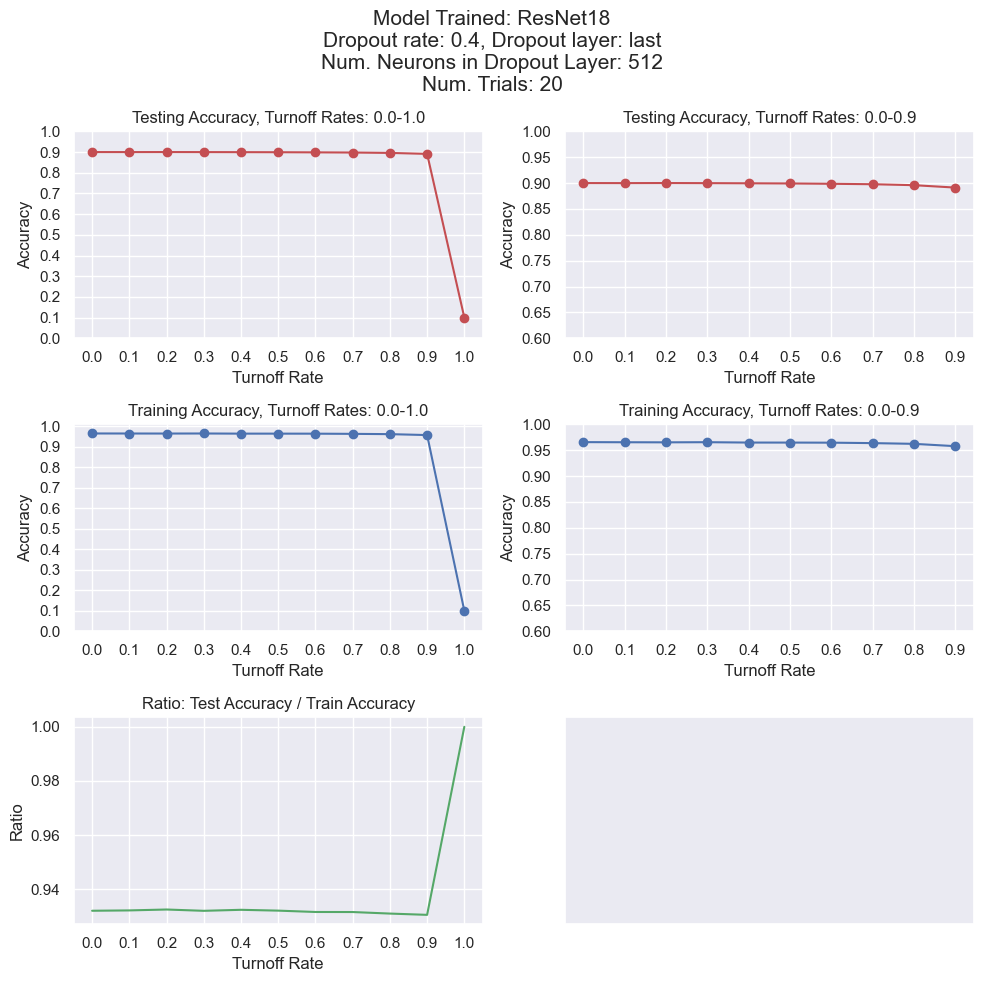

0.4_middle [0.000595 0.000556 0.000606 0.00059  0.000596 0.000579 0.00065  0.000751
 0.000519 0.000835 0.      ]


<Figure size 640x480 with 0 Axes>

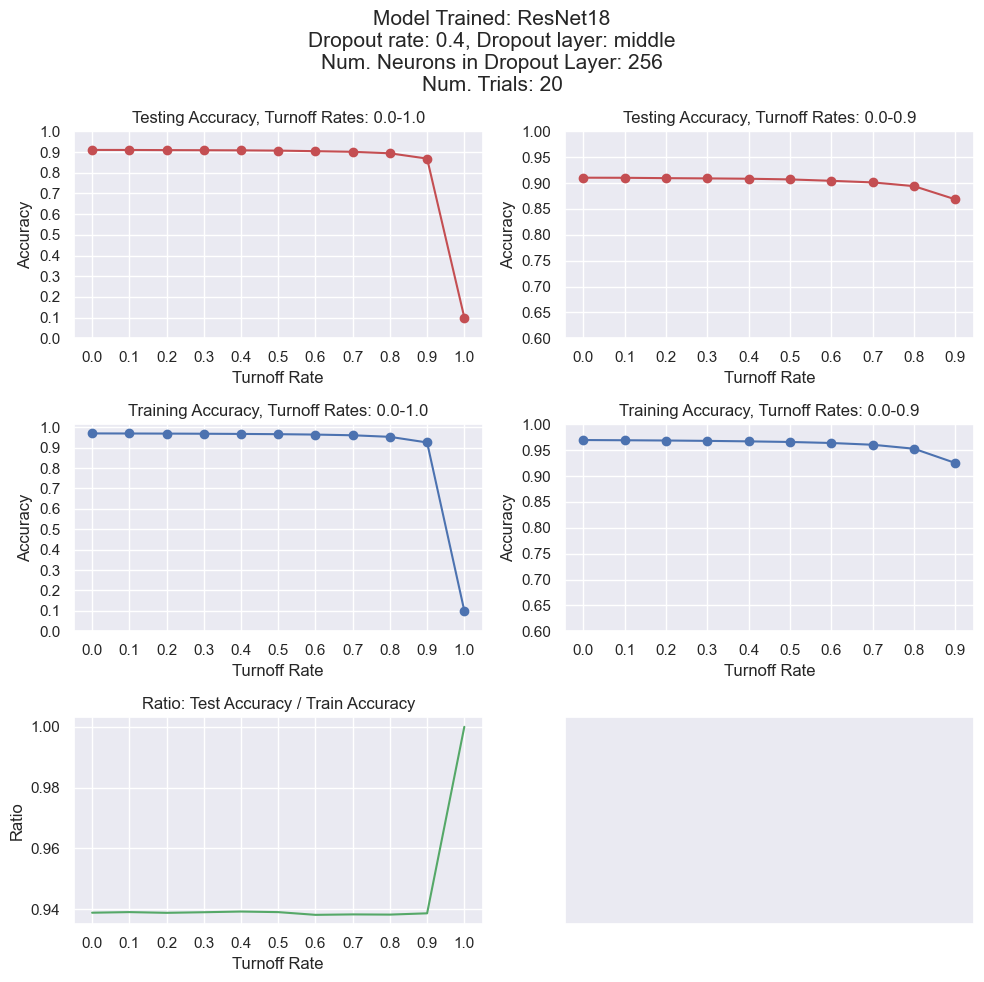

0.5_last [0.000366 0.000565 0.000412 0.000551 0.000529 0.000613 0.000732 0.000568
 0.000582 0.000662 0.      ]


<Figure size 640x480 with 0 Axes>

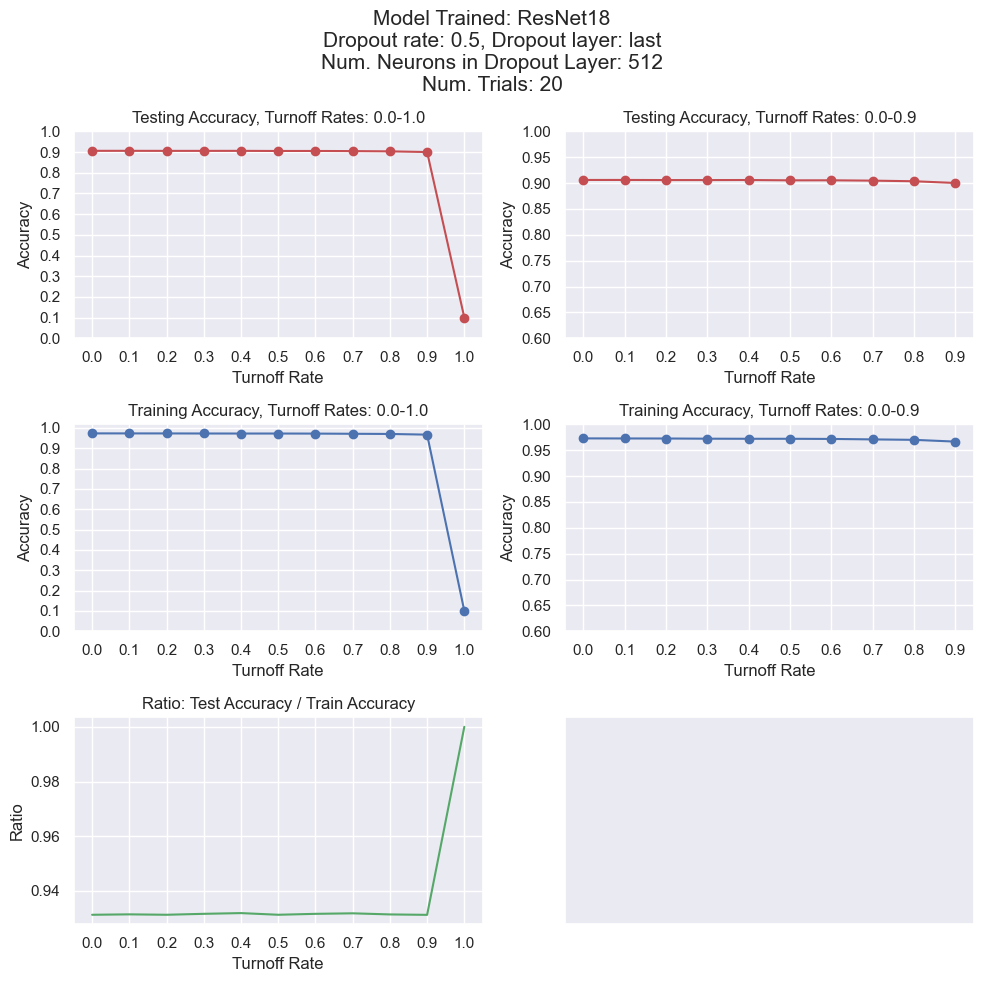

0.5_middle [0.000435 0.000635 0.000384 0.000598 0.000833 0.000497 0.000579 0.000605
 0.000816 0.000957 0.      ]


<Figure size 640x480 with 0 Axes>

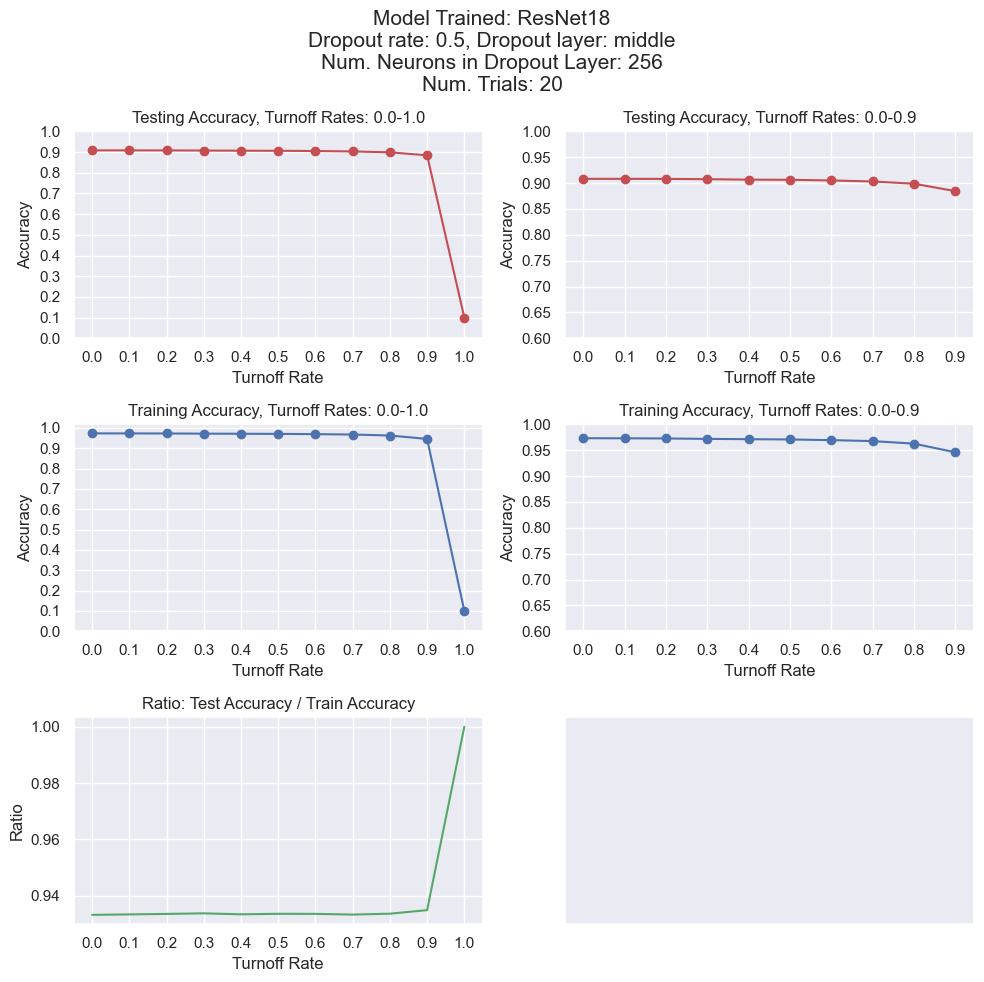

<Figure size 640x480 with 0 Axes>

In [231]:
num_neurons_str = None
for primary_key in data.keys():
    train_rate_acc, test_rate_acc = get_data_as_tuples(primary_key)
    test_rate, test_acc, test_std, train_rate, train_acc, train_std = get_unpacked_xy(test_rate_acc, train_rate_acc)
    print(primary_key, train_std)
    if num_neurons == 'results':
        if "mid" in primary_key:
            num_neurons_str = '256'
        else:
            num_neurons_str = '512'
    else:
        num_neurons_str = num_neurons
    dropout_rate, dropout_layer = primary_key.split('_')

    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 10), layout='tight')
    fig.suptitle(f"Model Trained: ResNet18\n"
                 f"Dropout rate: {dropout_rate}, Dropout layer: {dropout_layer}\n"
                 f"Num. Neurons in Dropout Layer: {num_neurons_str}\n"
                 f"Num. Trials: 20", fontsize=15)
    ax[0, 0].scatter(test_rate, test_acc, c='r')
    ax[0, 0].errorbar(test_rate, test_acc, test_std, c='r')
    ax[0, 0].grid(True)
    ax[0, 0].set_xticks(test_rate)
    ax[0, 0].set_yticks(np.arange(0, 1.1, 0.1))
    ax[0, 0].set_title('Testing Accuracy, Turnoff Rates: 0.0-1.0')
    ax[0, 0].set_xlabel('Turnoff Rate')
    ax[0, 0].set_ylabel('Accuracy')

    ax[0, 1].scatter(test_rate[:-1], test_acc[:-1], c='r')
    ax[0, 1].errorbar(test_rate[:-1], test_acc[:-1], yerr=test_std[:-1], c='r')
    ax[0, 1].grid(True)
    ax[0, 1].set_xticks(test_rate[:-1])
    ax[0, 1].set_yticks(np.arange(0.6, 1.05, 0.05))
    ax[0, 1].set_title('Testing Accuracy, Turnoff Rates: 0.0-0.9')
    ax[0, 1].set_xlabel('Turnoff Rate')
    ax[0, 1].set_ylabel('Accuracy')

    ax[1, 0].scatter(train_rate, train_acc)
    ax[1, 0].errorbar(train_rate, train_acc, train_std)
    ax[1, 0].set_xticks(train_rate)
    ax[1, 0].set_yticks(np.arange(0, 1.1, 0.1))
    ax[1, 0].grid(True)
    ax[1, 0].set_title("Training Accuracy, Turnoff Rates: 0.0-1.0")
    ax[1, 0].set_xlabel('Turnoff Rate')
    ax[1, 0].set_ylabel('Accuracy')

    ax[1, 1].scatter(train_rate[:-1], train_acc[:-1])
    ax[1, 1].errorbar(train_rate[:-1], train_acc[:-1], train_std[:-1])
    ax[1, 1].set_xticks(train_rate[:-1])
    ax[1, 1].grid(True)
    ax[1, 1].set_title("Training Accuracy, Turnoff Rates: 0.0-0.9")
    ax[1, 1].set_yticks(np.arange(0.6, 1.05, 0.05))
    ax[1, 1].set_xlabel('Turnoff Rate')
    ax[1, 1].set_ylabel('Accuracy')

    ratio = test_acc / train_acc
    ax[2, 0].plot(train_rate, ratio, 'g')
    ax[2, 0].set_xticks(train_rate)
    ax[2, 0].grid(True)
    ax[2, 0].set_title("Ratio: Test Accuracy / Train Accuracy")
    ax[2, 0].set_xlabel('Turnoff Rate')
    ax[2, 0].set_ylabel('Ratio')

    ax[2, 1].set_xticks([])
    ax[2, 1].set_yticks([])

    plt.show()
    fig.savefig(f"test/{primary_key}_{num_neurons_str}.png")  # Save the figure as PNG
    plt.clf()  # Clear the entire figure in matplotlib

In [234]:
training_data = {}
testing_data = {}
for primary_key in data.keys():
    primary_key_new = f"{primary_key.replace('_', ' ')} dropout"
    training_data[primary_key_new] = {}
    testing_data[primary_key_new] = {}
    for secondary_key, curr_accuracy in data[primary_key].items():
        dropout_rate, eval_type = secondary_key.split('_')
        rounded_key = f"{round(float(dropout_rate), 2)} {eval_type} turnoff"
        if 'test' in rounded_key:
            testing_data[primary_key_new][rounded_key] = curr_accuracy
        else:
            training_data[primary_key_new][rounded_key] = curr_accuracy

In [235]:
training_data

{'0.0 last dropout': {'0.0 train turnoff': 0.981999,
  '0.1 train turnoff': 0.981818,
  '0.2 train turnoff': 0.981494,
  '0.3 train turnoff': 0.981427,
  '0.4 train turnoff': 0.980905,
  '0.5 train turnoff': 0.980762,
  '0.6 train turnoff': 0.979999,
  '0.7 train turnoff': 0.97882,
  '0.8 train turnoff': 0.976638,
  '0.9 train turnoff': 0.9689,
  '1.0 train turnoff': 0.1},
 '0.0 middle dropout': {'0.0 train turnoff': 0.974725,
  '0.1 train turnoff': 0.97362,
  '0.2 train turnoff': 0.972478,
  '0.3 train turnoff': 0.970524,
  '0.4 train turnoff': 0.967611,
  '0.5 train turnoff': 0.963706,
  '0.6 train turnoff': 0.957572,
  '0.7 train turnoff': 0.945204,
  '0.8 train turnoff': 0.915026,
  '0.9 train turnoff': 0.790341,
  '1.0 train turnoff': 0.1},
 '0.1 last dropout': {'0.0 train turnoff': 0.98007,
  '0.1 train turnoff': 0.979775,
  '0.2 train turnoff': 0.979645,
  '0.3 train turnoff': 0.97957,
  '0.4 train turnoff': 0.979442,
  '0.5 train turnoff': 0.979254,
  '0.6 train turnoff': 0.978

<AxesSubplot: >

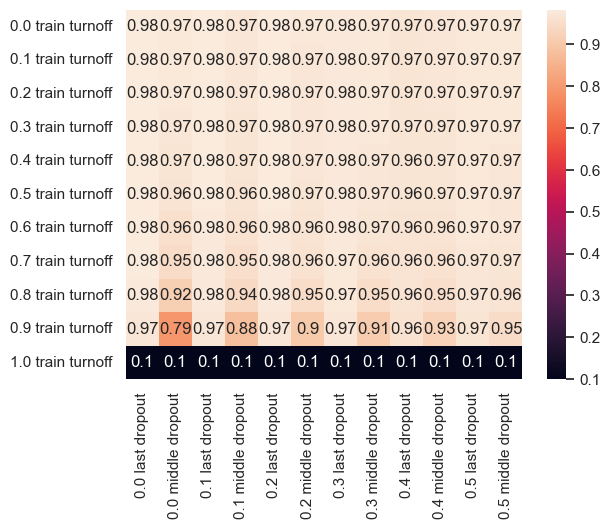

In [236]:
sns.heatmap(pd.DataFrame(training_data), annot=True)

In [237]:
pd.DataFrame(data).drop()

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'